In [34]:
import pandas as pd
import yfinance as yf
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as mplt
import seaborn as sn
from datetime import datetime
import os

In [35]:
os.getcwd()

'c:\\Users\\Computadores Gamer\\OneDrive\\Documentos\\codigos importantes\\python'

In [2]:
yf.pdr_override() #corrige problemas da bibliotece do pandas_datareader

In [ ]:
# lista de codigos de acoes do yahoo finance no mercado brasileiro


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_2908\2484753288.py:22: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tabela['retorno_1'] = pd.Series()
C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_2908\2484753288.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tabela['retorno_2'] = pd.Series()


<Axes: xlabel='Date'>

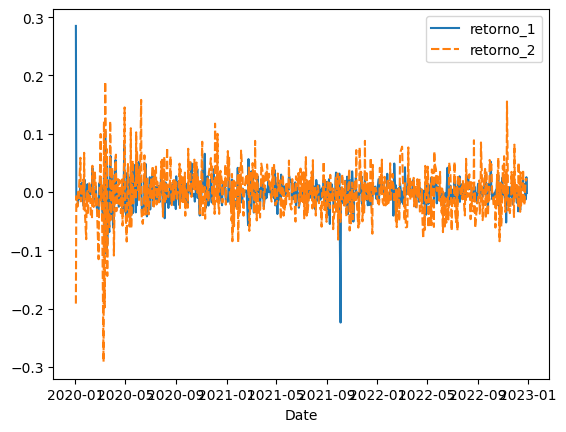

In [97]:
# definicao das datas e das acoes
data_i = '2020-01-01'
data_f = '2023-01-01'
acao_1 = ['ITUB3.SA']
acao_2 = ['CSNA3.SA']


# tabela de cotacoes
# pegar mensalmente => dados_mensais = tabela_1.resample('M').first()

tabela_1 = yf.download(acao_1, start = data_i, end=data_f)['Adj Close']
tabela_2 = yf.download(acao_2, start = data_i, end=data_f)['Adj Close']
tabela = pd.DataFrame({'acao_1':tabela_1,
                      'acao_2':tabela_2})





# calculo retorno contínuo das ações em questão
# precisa corrigir o primeiro termo para ficar com zero pq o denominador da fracao é zero
tabela['retorno_1'] = pd.Series()
for i in range(len(tabela_1)):
    tabela['retorno_1'][i] = np.log(tabela['acao_1'][i]/tabela['acao_1'][i-1])
    
tabela['retorno_2'] = pd.Series()
for i in range(len(tabela_1)):
    tabela['retorno_2'][i] = np.log(tabela['acao_2'][i]/tabela['acao_2'][i-1]) 
    
# tabela de retornos
tabela_retornos = tabela[['retorno_1', 'retorno_2']]  



sn.lineplot(data=tabela) 
sn.lineplot(data = tabela_retornos)